In [1]:
import matplotlib.pyplot as plt
import numpy as np

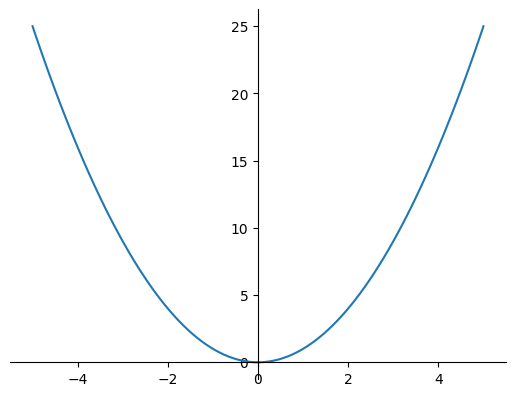

In [2]:
# 100 linearly spaced numbers
x = np.linspace(-5, 5, 100)

# the function, which is y = x^2 here
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x, y)

# show the plot
plt.show()